In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 匯入套件

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import os
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. 建立模型

In [3]:
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(160, 160, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [4]:
model = Sequential()
model.add(resnet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

resnet_model.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 5, 5, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_______________________________________

## 3. 匯入權重

In [5]:
model.load_weights("/content/drive/MyDrive/AI_共用/identify_food&menu/菜單160*160_best_model.h5")

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## 4. 載入圖片

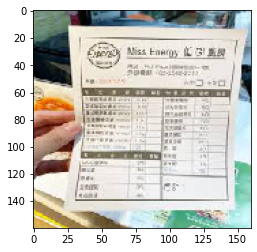

In [7]:
img_np = np.empty((3,160,160,3))

img = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo.jpg", target_size=(160, 160))
x = img_to_array(img)
plt.imshow(img)
img = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img = preprocess_input(img)

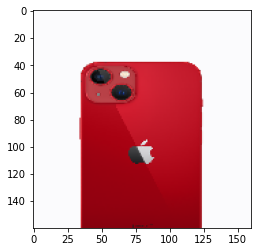

In [8]:
img2 = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo2.jpg", target_size=(160, 160))
x = img_to_array(img2)
plt.imshow(img2)
img2 = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img2 = preprocess_input(img2)

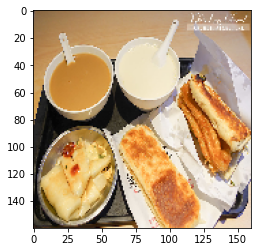

In [9]:
img3 = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo3.jpg", target_size=(160, 160))
x = img_to_array(img3)
plt.imshow(img3)
img3 = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img3 = preprocess_input(img3)

In [10]:
img_np[0] = img
img_np[1] = img2
img_np[2] = img3

## 5. 執行預測

In [11]:
result = model.predict(img_np)
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
print("全部預測結果：")
print(result, end = "\n\n")
maxindex = np.argmax(result, axis = 1)
print("個別結果：")
for index, i in enumerate(maxindex):
  print("第" + str(index + 1) + "張：", end = "")
  if i == 0:
    print("食物")
  if i == 1:
    print("非食物")
  if i == 2:
    print("菜單")

全部預測結果：
[[ 0.00006  0.00005  0.99988]
 [ 0.00001  0.99998  0.00002]
 [ 1.00000  0.00000  0.00000]]

個別結果：
第1張：菜單
第2張：非食物
第3張：食物
